Current analysis
Kristinn Torfason ??? &
Hákon Örn Árnason 01.09.20

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as path
from scipy.constants import pi, e, hbar, m_e, epsilon_0
filepath = '/home/hakon/Documents/Code/Vacuum-MD/data/6000sigma/29/' # Insert the path to data folder
filepath2 = '/home/hakon/Documents/Code/Vacuum-MD/data/3000sigma/10/' # Insert the path to data folder
filepath3 = '/home/hakon/Documents/Code/Vacuum-MD/data/1000sigma/2/' # Insert the path to data folder
filepath5 = '/home/hakon/Documents/Code/Vacuum-MD/data/1000sigma/20/' # Insert the path to data folder

In [64]:
# Designating files
filename_ramo = path.join(filepath, 'out/ramo_current.dt') # Ramo current
filename_emission = path.join(filepath, 'out/emitted.dt') # Emitted Electrons
filename_absorbed_top = path.join(filepath, 'out/absorbed_top.dt') # Absorbed Electrons at top of cell
filename_absorbed_bot = path.join(filepath, 'out/absorbed_bot.dt') # Absorbed Electrons at bottom of cell

In [65]:
data = np.loadtxt(filename_ramo) # Loading in Ramo current
# cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time            = data[:, 0]
step                = data[:, 1]
ramo_cur            = data[:, 2]
#V_d                = data[:, 3]
nrPart              = data[:, 4]
nrElec              = data[:, 5]
#nrHole             = data[:, 6]
ramo_cur_sec_1      = data[:, 7]
ramo_cur_sec_2      = data[:, 8]
ramo_cur_sec_3      = data[:, 9]
ramo_cur_sec_4      = data[:, 10]
#ramo_cur_sec_5     = data[:, 11]
#ramo_cur_sec_6     = data[:, 12]
#ramo_cur_sec_7     = data[:, 13]
#ramo_cur_sec_8     = data[:, 14]
#ramo_cur_sec_9     = data[:, 15]
#ramo_cur_sec_10    = data[:, 16]
#ramo_cur_sec_11    = data[:, 17]
#ramo_cur_sec_12    = data[:, 18]
#ramo_cur_sec_13    = data[:, 19]
#ramo_cur_sec_14    = data[:, 20]
#ramo_cur_sec_15    = data[:, 21]
#ramo_cur_sec_16    = data[:, 22]

x_min = np.min(cur_time)
x_max = np.max(cur_time)

In [66]:
data = np.loadtxt(filename_emission)
emit_time    = data[:, 0]
emit_step    = data[:, 1]
emit_elec    = data[:, 2]
emit_total   = data[:, 3]
emit_nrElecs = data[:, 4]
emit_nrHoles = data[:, 5]
emit_pulse   = data[:, 6]

In [67]:
data = np.loadtxt(filename_absorbed_top)
absor_time = data[:, 0]
absor_step = data[:, 1]
absor_elec = data[:, 2]

In [68]:
data = np.loadtxt(filename_absorbed_bot)
absor_bot_time = data[:, 0]
absor_bot_step = data[:, 1]
absor_bot_elec = data[:, 2]

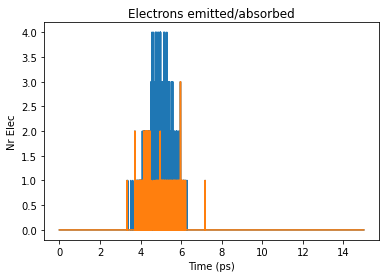

In [69]:
plt.plot(emit_time, emit_pulse)
#plt.plot(absor_time, absor_elec)
plt.plot(emit_time, emit_elec)
#plt.plot(absor_bot_time, absor_bot_elec)

plt.title('Electrons emitted/absorbed')
plt.xlabel('Time (ps)')
plt.ylabel('Nr Elec')
plt.show()

Text(0, 0.5, 'Nr Elec')

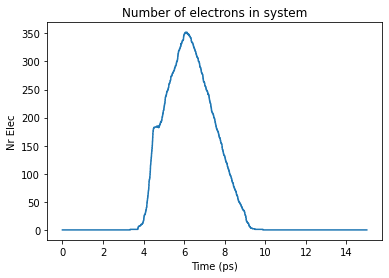

In [70]:
plt.plot(cur_time, nrElec)
plt.title('Number of electrons in system')
plt.xlabel('Time (ps)')
plt.ylabel('Nr Elec')

Text(0, 0.5, 'Current [A]')

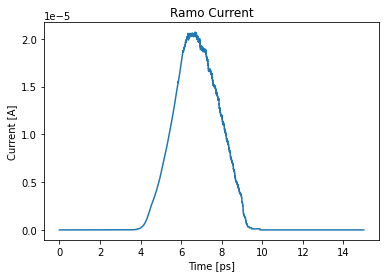

In [71]:
plt.plot(cur_time, ramo_cur)
plt.title('Ramo Current')
plt.xlabel('Time [ps]')
plt.ylabel('Current [A]')

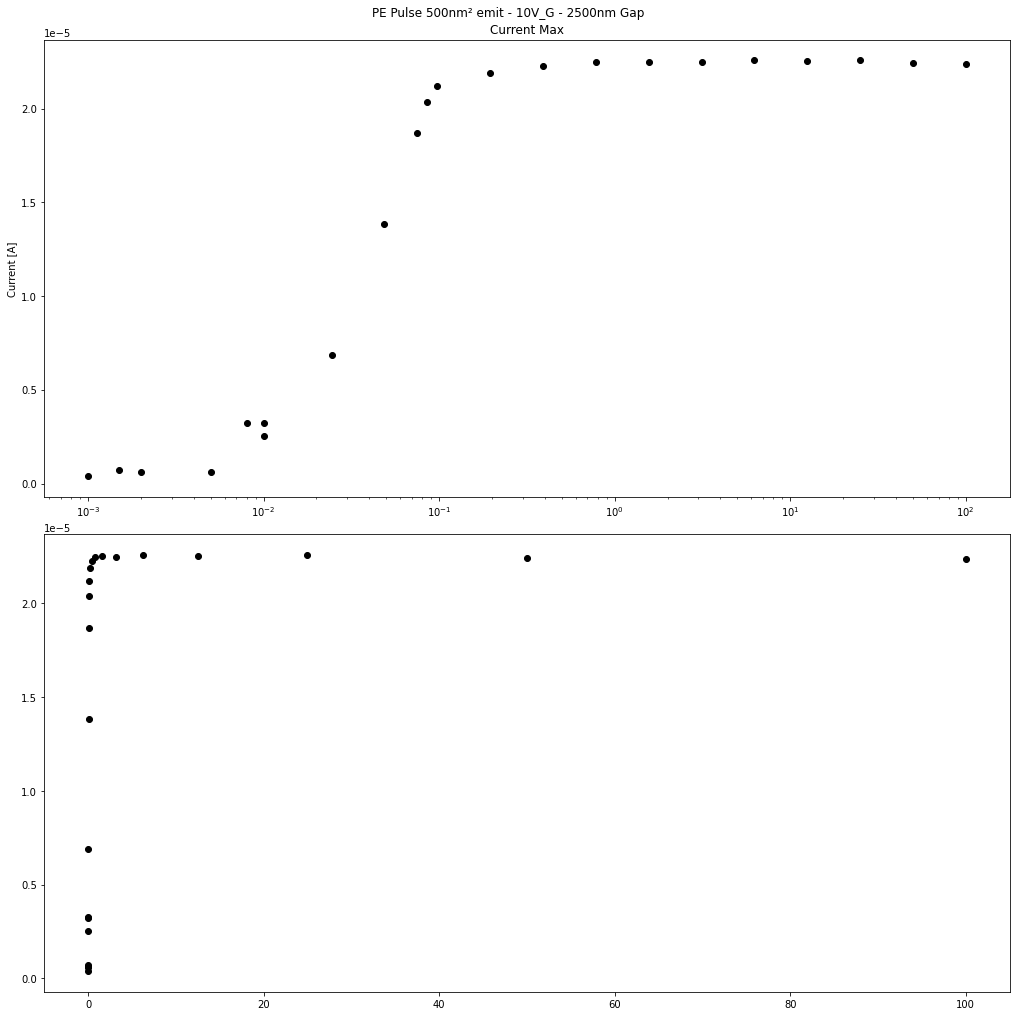

In [72]:
import glob
from pathlib import Path

fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(14, 14)) #sharex=True,
fig.suptitle('PE Pulse 500nm² emit - 10V_G - 2500nm Gap')
#axs[0].set_title('Nr Elec in System')
#axs[0].set_ylabel('Nr Electrons')
#axs[1].set_title('Ramo')
#axs[1].set_ylabel('Current [A]')
axs[0].set_title('Current Max')
axs[0].set_ylabel('Current [A]')
count = 0
counting = [100, 50, 25, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125, 0.09765625,
            0.048828125, 0.0244140625, 0.075, 0.085, 0.01, 0.01, 0.001, 0.0015, 0.002, 0.005, 0.008]

p = Path('/home/hakon/Documents/PE Simulations/June21/')
for name in p.glob('**/*A*/**/out/ramo_current.dt'):
    # Loading in one batch of sim.
    data = np.loadtxt(name)
    cur_time = data[:, 0]
    ramo_cur = data[:, 2]
    nrElec = data[:, 5]
    cur_max = np.amax(ramo_cur)
    #axs[0].plot(cur_time, nrElec)
    #axs[1].plot(cur_time, ramo_cur)
    axs[0].semilogx(counting[count],cur_max, 'ko')
    axs[1].plot(counting[count],cur_max, 'ko')
    count += 1

#axs[0].legend( ['1', '1/2', '1/4', '1/8','1/16','1/32','1/48','1/64','1/80','1/96','1/128','1/160','1/192','1/256'],loc='center left', bbox_to_anchor=(0.8, 0.5))

In [73]:
# # Loading in one batch of sim.
# filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
# filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
# data = np.loadtxt(filename_ramo)
# cur_time1 = data[:, 0]
# ramo_cur1 = data[:, 2]
# nrElec1 = data[:, 5]

In [74]:
# Loading in one batch of sim.
filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
filename_emission = path.join(filepath, 'emitted.dt') # Emitted Electrons
data = np.loadtxt(filename_emission)
emit_time1 = data[:, 0]
emit_elec1 = data[:, 2]
emit_total1 = data[:, 3]
emit_pulse1 = data[:, 6]

OSError: /home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out/emitted.dt not found.

In [ ]:
# Loading in one batch of sim.
filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
filename_absorbed = path.join(filepath, 'absorbed.dt') # Absorbed Electrons
data = np.loadtxt(filename_absorbed)
absor_time2 = data[:, 0]
absor_elec2 = data[:, 2]

In [ ]:
fig, axs = plt.subplots(5, 1, sharex=True, constrained_layout=True, figsize=(14, 14))
fig.suptitle('PE Pulse 500nm² emit - 10V_G - 2500nm Gap')
axs[0].set_title('Nr Elec in System')
axs[0].plot(cur_time1, nrElec1, cur_time2, nrElec2, cur_time3, nrElec3, cur_time4, nrElec4, cur_time5, nrElec5, cur_time6, nrElec6, cur_time7, nrElec7, cur_time8, nrElec8, cur_time9, nrElec9, cur_time10, nrElec10, cur_time11, nrElec11, cur_time12, nrElec12, cur_time13, nrElec13, cur_time14, nrElec14)
axs[0].set_ylabel('Nr Electrons')
axs[0].legend( ['1', '1/2', '1/4', '1/8','1/16','1/32','1/48','1/64','1/96','1/128','1/192','1/256'],loc='center left', bbox_to_anchor=(0.8, 0.5))

axs[1].set_title('Ramo')
axs[1].plot(cur_time1, ramo_cur1, cur_time2, ramo_cur2, cur_time3, ramo_cur3, cur_time4, ramo_cur4, cur_time5, ramo_cur5, cur_time6, ramo_cur6, cur_time7, ramo_cur7, cur_time8, ramo_cur8, cur_time9, ramo_cur9, cur_time10, ramo_cur10, cur_time11, ramo_cur11, cur_time12, ramo_cur12, cur_time13, ramo_cur13, cur_time14, ramo_cur14)
axs[1].set_ylabel('Current [A]')

axs[2].set_title('Pulse out')
axs[2].plot(emit_time1, emit_elec1, emit_time2, emit_elec2 , emit_time3, emit_elec3, emit_time4, emit_elec4, emit_time5, emit_elec5, emit_time6, emit_elec6, emit_time7, emit_elec7, emit_time8, emit_elec8, emit_time9, emit_elec9, emit_time10, emit_elec10, emit_time11, emit_elec11, emit_time12, emit_elec12, emit_time13, emit_elec13, emit_time14, emit_elec14)
axs[2].set_ylabel('Nr emit. elec')

axs[3].set_title('Absorbed')
axs[3].plot(absor_time2, absor_elec2, absor_time3, absor_elec3, absor_time4, absor_elec4, absor_time5, absor_elec5, absor_time6, absor_elec6, absor_time7, absor_elec7, absor_time8, absor_elec8, absor_time9, absor_elec9, absor_time10, absor_elec10, absor_time11, absor_elec11, absor_time12, absor_elec12, absor_time13, absor_elec13, absor_time14, absor_elec14, absor_time15, absor_elec15)
axs[3].set_ylabel('Nr absor. elec')

axs[4].set_title('Pulse in')
axs[4].plot(emit_time1, emit_pulse1, emit_time2, emit_pulse2, emit_time3, emit_pulse3, emit_time4, emit_pulse4, emit_time5, emit_pulse5, emit_time6, emit_pulse6, emit_time7, emit_pulse7, emit_time8, emit_pulse8, emit_time9, emit_pulse9, emit_time10, emit_pulse10, emit_time11, emit_pulse11, emit_time12, emit_pulse12, emit_time13, emit_pulse13, emit_time14, emit_pulse14)
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Nr emit. elec')

plt.show()

NameError: name 'cur_time1' is not defined

In [ ]:
center_sec = ramo_cur_sec_6 + ramo_cur_sec_7 + ramo_cur_sec_10 + ramo_cur_sec_11
outside_sec = ramo_cur_sec_1 + ramo_cur_sec_2 + ramo_cur_sec_3 + ramo_cur_sec_4 \
            + ramo_cur_sec_5 + ramo_cur_sec_8 + ramo_cur_sec_9 + ramo_cur_sec_12 \
            + ramo_cur_sec_13 + ramo_cur_sec_14 + ramo_cur_sec_15 + ramo_cur_sec_16

NameError: name 'ramo_cur_sec_6' is not defined

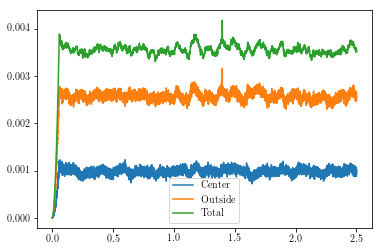

In [ ]:
plt.plot(cur_time, center_sec, \
         cur_time, outside_sec, \
         cur_time, ramo_cur)
plt.legend(['Center', 'Outside', 'Total'])

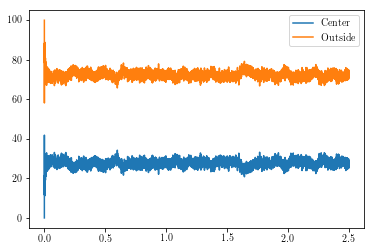

In [ ]:
center_per = center_sec/ramo_cur
outside_per = outside_sec/ramo_cur
plt.plot(cur_time, center_per*100, \
         cur_time, outside_per*100)
plt.legend(['Center', 'Outside'])

In [ ]:
center_mean = np.mean(center_per)
outside_mean = np.mean(outside_per)
print(center_mean*100)
print(outside_mean*100)
print((center_mean + outside_mean)*100)

27.6541146375079
72.34609217872617
100.00020681623407


In [ ]:
a_FN = e**2/(16.0*pi**2*hbar) # A eV V^{-2}
b_FN = -4.0/(3.0*hbar) * np.sqrt(2.0*m_e*e) # eV^{-3/2} V m^{-1}
l_const = e / (4.0*pi*epsilon_0) # eV^{2} V^{-1} m

In [ ]:
w_theta = 4.65 # work function in eV
time_step = 0.25E-15 # Time step in sec

V = 20.0E3 # Voltage
d = 2500.0E-9 # Gap spacing
L = 100.0E-9 #Side length of emitter

F = V/d # Electric Field
#A = L**2 # Area of emitter

In [ ]:
def t_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    t_y = 1.0 + l*( 1.0/9.0 - 1.0/18.0*np.log(l) )
    return t_y

def v_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    v_y = 1.0 - l + 1.0/6.0 * l * np.log(l)
    return v_y

def FN_current(A_in, w_theta_xy, F):
    J = a_FN/(w_theta_xy*t_y(F, w_theta_xy)**2)*F**2 * np.exp(v_y(F, w_theta_xy)*b_FN*w_theta_xy**(3/2)/F)
    I = A_in*J
    return I

In [ ]:
A_0 = 25.0E-9*25.0E-9
I_cen = FN_current(4*A_0, 4.65, F)
I_out = FN_current(12*A_0, 4.70, F)
I_tot = I_cen + I_out
print(I_cen)
print(I_out)
print(I_tot)

0.0013490933153878734
0.0034559137678192094
0.004805007083207083


In [ ]:
I_cen_per = I_cen/I_tot
I_out_per = I_out/I_tot
print(I_cen_per*100.0)
print(I_out_per*100.0)

28.076822614950785
71.92317738504921


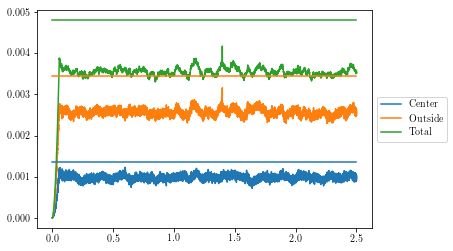

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, '$I/I_{tot}$')

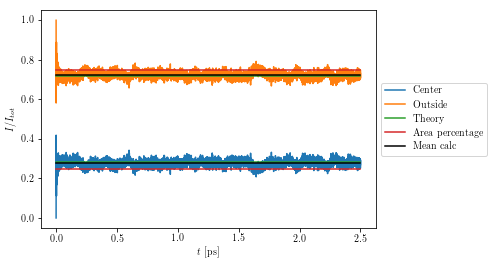

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_per, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_per, label='Outside', color='#ff7f0e')
ax.plot([x_min, x_max], [I_cen_per, I_cen_per], color='#2ca02c')
ax.plot([x_min, x_max], [I_out_per, I_out_per], color='#2ca02c', label='Theory')
ax.plot([x_min, x_max], [0.25, 0.25], color='#d62728')
ax.plot([x_min, x_max], [0.75, 0.75], color='#d62728', label='Area percentage')
ax.plot([x_min, x_max], [center_mean, center_mean], color='black')
ax.plot([x_min, x_max], [outside_mean, outside_mean], color='black', label='Mean calc')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$I/I_{tot}$')

In [ ]:
filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/50nm_X_50nm/4.65-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_50 = data[:, 0]
ramo_cur_50 = data[:, 2]

filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/86.60nm_X_86.60nm/4.70-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_86 = data[:, 0]
ramo_cur_86 = data[:, 2]

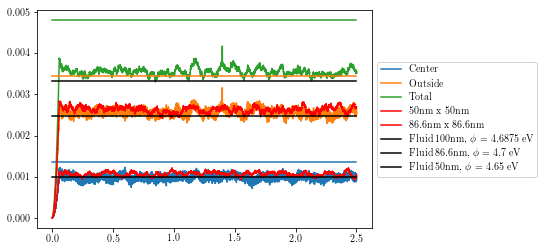

In [ ]:
I_fluid_100 = 3.33890157e+11*(100.0E-9)**2
I_fluid_86 = 3.30211120e+11*(86.6025E-9)**2
I_fluid_50 = 3.9934936e+11*(50.0E-9)**2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
ax.plot(cur_time_50, ramo_cur_50, label='50nm x 50nm', color='red')
ax.plot(cur_time_86, ramo_cur_86, label='86.6nm x 86.6nm', color='red')
ax.plot([x_min, x_max], [I_fluid_100, I_fluid_100], label='Fluid 100nm, $\phi$ = 4.6875 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_86, I_fluid_86], label='Fluid 86.6nm, $\phi$ = 4.7 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_50, I_fluid_50], label='Fluid 50nm, $\phi$ = 4.65 eV', color='black')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))